In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lat = np.linspace(-np.pi/2, np.pi/2, 60)
lon = np.linspace(-np.pi,   np.pi,  120)

In [4]:
x, y = np.meshgrid(np.sin(lon[30:91]), np.sin(lat))

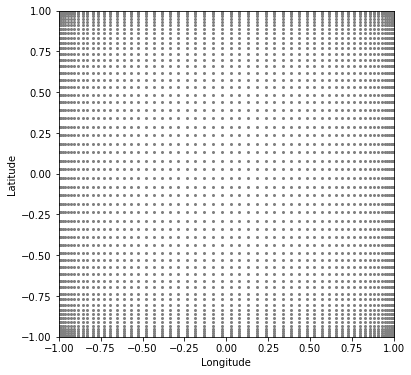

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

ax.set_xlabel("Longitude")
ax.set_xlim(-1, 1)

ax.set_ylabel("Latitude")
ax.set_ylim(-1, 1)

pl=ax.plot(x, y, 'o', ms=2.0, c="gray")

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
r   = 100.
x3d = r * np.outer(np.cos(np.pi+lon), np.sin(np.pi/2 + lat))
y3d = r * np.outer(np.sin(np.pi+lon), np.sin(np.pi/2 + lat))
z3d = r * np.outer(np.ones(np.size(lon)), np.cos(np.pi/2 + lat))

In [8]:
f_surface = 0.75

In [9]:
import numpy.random as rand

In [10]:
import matplotlib.colors as colors
cconverter=colors.ColorConverter()

In [11]:
# generate random "spots" by shading different surface elements
el_colors = np.full(x3d.shape, "y", dtype=str)
N_elems = len(lat)*len(lon)
N_spots = int(f_surface*N_elems)
for n in range(N_spots):
    x_spot = rand.randint(0, x3d.shape[0])
    y_spot = rand.randint(0, x3d.shape[1])
    
    el_colors[x_spot, y_spot] = "r"

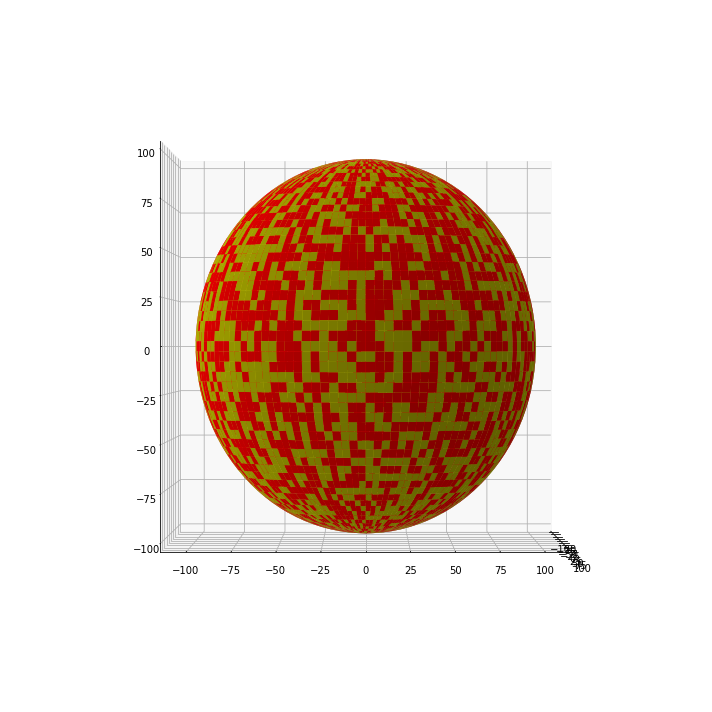

In [18]:
fig = plt.figure(figsize=(10,10))

ax  = fig.add_subplot(111, projection="3d")

sp = ax.plot_surface(x3d, y3d, z3d, rstride=1, cstride=1, facecolors=el_colors, linewidth=0)

ax.view_init(azim=0,elev=0)

fig.tight_layout()
#fig.savefig("spotted_star_f90.pdf")

In [13]:
fcs = sp.get_facecolors()
len(fcs)

7021

In [14]:
el_colors.shape

(120, 60)

In [15]:
fluxes = np.empty((lon.shape[0], lat.shape[0], 1))
specks = np.empty((lon.shape[0], lat.shape[0], 1), dtype="U1")

In [16]:
for i in range(len(lon)):
    for j in range(len(lat)):
        if el_colors[i, j] == 'r':
            b = 0.8
        else:
            b = 1.0
        fluxes[i, j] = b
        specks[i, j] = el_colors[i, j]

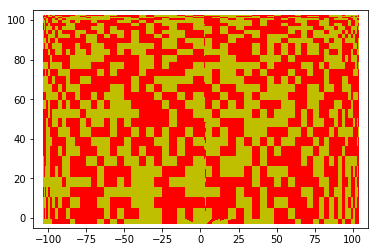

In [17]:
for i in range(90):
    for j in range(60):
        pl=plt.plot(x3d[i], y3d[j], 's', ms=10.0, c=specks[30+i, j][0])